In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import norm
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import shapiro
from scipy.stats import kstest
from statsmodels.tsa.seasonal import STL
from scipy import special

In [158]:
df=pd.read_csv('DataFix.csv',sep=';', decimal=',', index_col='DATE', parse_dates=True, dayfirst=True)
pd.set_option('display.float_format', '{:,.2f}'.format)
df.sort_index(inplace=True)
print(df.shape)
df.head()

(365, 1)


,VOLUME
DATE,
2022-06-01,"44,003.56"
2022-06-02,"48,991.85"
2022-06-03,"51,690.92"
2022-06-04,"47,790.83"
2022-06-05,"42,896.64"


In [159]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [160]:
df_date = df.reset_index()
df_date.drop("VOLUME", axis=1, inplace=True)
print(df_date)

train_size_date = int(len(df_date) * 0.8)  # Use 80% of the data for training
train_date = df_date.iloc[:train_size_date]
test_date = df_date.iloc[train_size_date:]
print(df_date.shape)
print(train_date.shape,test_date.shape)



          DATE
0   2022-06-01
1   2022-06-02
2   2022-06-03
3   2022-06-04
4   2022-06-05
..         ...
360 2023-05-27
361 2023-05-28
362 2023-05-29
363 2023-05-30
364 2023-05-31

[365 rows x 1 columns]
(365, 1)
(292, 1) (73, 1)


In [112]:
pd.DataFrame(test_date.reset_index(inplace=True))
test_date.drop("index", axis=1, inplace=True)
test_date = pd.DataFrame(test_date)
test_date

C:\Users\rizki\AppData\Local\Temp\ipykernel_12960\3663532941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_date.drop("index", axis=1, inplace=True)


,DATE
0,2023-03-20
1,2023-03-21
2,2023-03-22
3,2023-03-23
4,2023-03-24
...,...
68,2023-05-27
69,2023-05-28
70,2023-05-29
71,2023-05-30


In [113]:
# df.reset_index(inplace=True)
# df['DATE'] = pd.to_numeric(pd.to_datetime(df['DATE']))

# # Split the data into train and test sets
# train_size = int(len(df) * 0.8)  # Use 80% of the data for training
# train = df.iloc[:train_size]
# test = df.iloc[train_size:]
# print(df.shape)
# print(train.shape,test.shape)

(365, 2)
(292, 2) (73, 2)


In [146]:
# df.reset_index(inplace=True)
# df = df.drop('DATE', axis=1)
# df['DATE'] = range(1, len(df) + 1)
# df

# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # Use 80% of the data for training
train = df.iloc[:train_size]
test = df.iloc[train_size:]
print(df.shape)
print(train.shape,test.shape)

(365, 2)
(292, 2) (73, 2)


In [171]:
#train
x_train = train['DATE'].values.reshape(-1, 1)
y_train = train["VOLUME"]

#test
x_test = test['DATE'].values.reshape(-1, 1)
y_test = test["VOLUME"]

#shape
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(292, 1) (73, 1) (292,) (73,)


In [172]:
x_test

array([[293],
       [294],
       [295],
       [296],
       [297],
       [298],
       [299],
       [300],
       [301],
       [302],
       [303],
       [304],
       [305],
       [306],
       [307],
       [308],
       [309],
       [310],
       [311],
       [312],
       [313],
       [314],
       [315],
       [316],
       [317],
       [318],
       [319],
       [320],
       [321],
       [322],
       [323],
       [324],
       [325],
       [326],
       [327],
       [328],
       [329],
       [330],
       [331],
       [332],
       [333],
       [334],
       [335],
       [336],
       [337],
       [338],
       [339],
       [340],
       [341],
       [342],
       [343],
       [344],
       [345],
       [346],
       [347],
       [348],
       [349],
       [350],
       [351],
       [352],
       [353],
       [354],
       [355],
       [356],
       [357],
       [358],
       [359],
       [360],
       [361],
       [362],
       [363],
      

In [173]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [179]:
y_pred = model.predict(x_test)

In [180]:
y_test.shape

(73,)

In [181]:
import numpy as np
from sklearn.metrics import mean_squared_error

mad = np.mean(np.abs(y_test - y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Deviation (MAD):", mad)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Deviation (MAD): 7630.5353394945305
Mean Absolute Percentage Error (MAPE): 23.44097467406371
Mean Squared Error (MSE): 114735346.22473876


In [182]:
y_pred

array([48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492959,
       48867.9492959, 48867.9492959, 48867.9492959, 48867.9492

In [183]:
result = pd.DataFrame({'ACTUAL':y_test,'FORECAST':y_pred,'DATE':test_date['DATE']})
result.set_index('DATE')

,ACTUAL,FORECAST
DATE,,
2023-03-20,"54,475.40","48,867.95"
2023-03-21,"55,916.10","48,867.95"
2023-03-22,"48,862.36","48,867.95"
2023-03-23,"50,378.88","48,867.95"
2023-03-24,"53,045.17","48,867.95"
...,...,...
2023-05-27,"42,088.95","48,867.95"
2023-05-28,"34,965.85","48,867.95"
2023-05-29,"41,785.99","48,867.95"


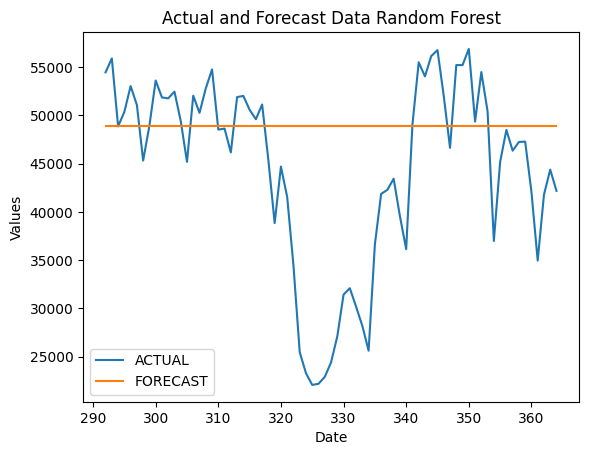

In [184]:
import matplotlib.pyplot as plt

result.plot(kind='line', y=['ACTUAL', 'FORECAST'])

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual and Forecast Data Random Forest')

plt.show()


future forecast

In [165]:
numbers = list(range(366, 396))
future_x = pd.DataFrame(numbers, columns=['DATE'])
future_x

,DATE
0,366
1,367
2,368
3,369
4,370
5,371
6,372
7,373
8,374
9,375


In [166]:
y_pred = model.predict(future_x)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- VOLUME


### RANDOM FOREST WITH HOLIDAY

In [197]:
df_holiday=pd.read_csv('DataSARIMAX.csv',sep=';', decimal=',', parse_dates=True, dayfirst=True)
pd.set_option('display.float_format', '{:,.2f}'.format)
df_holiday.sort_index(inplace=True)
print(df_holiday.shape)
df_holiday.head()

(365, 5)


,DATE,DAY,HOLIDAY,HOLIDAY_NAME,VOLUME
0,01/06/2022,Wednesday,1,Hari Lahir Pancasila,44003.56
1,02/06/2022,Thursday,0,na,48991.85
2,03/06/2022,Friday,0,na,51690.92
3,04/06/2022,Saturday,0,na,47790.83
4,05/06/2022,Sunday,0,na,42896.64


In [194]:
print(df_holiday.dtypes)

DATE            object
DAY             object
HOLIDAY          int64
HOLIDAY_NAME    object
VOLUME          object
dtype: object


In [198]:
df_holiday['VOLUME'] = df_holiday['VOLUME'].astype(float)
df_holiday['HOLIDAY'] = df_holiday['HOLIDAY'].astype(int)

In [188]:
print(df_holiday.dtypes)
df_holiday.head()

DATE             object
DAY              object
HOLIDAY           int32
HOLIDAY_NAME     object
VOLUME          float64
dtype: object


,DATE,DAY,HOLIDAY,HOLIDAY_NAME,VOLUME
0,01/06/2022,Wednesday,1,Hari Lahir Pancasila,"44,003.56"
1,02/06/2022,Thursday,0,na,"48,991.85"
2,03/06/2022,Friday,0,na,"51,690.92"
3,04/06/2022,Saturday,0,na,"47,790.83"
4,05/06/2022,Sunday,0,na,"42,896.64"


In [199]:
df_holiday = df_holiday.drop(df_holiday.columns[[0, 1]], axis=1)
df_holiday.head()

,HOLIDAY,HOLIDAY_NAME,VOLUME
0,1,Hari Lahir Pancasila,"44,003.56"
1,0,na,"48,991.85"
2,0,na,"51,690.92"
3,0,na,"47,790.83"
4,0,na,"42,896.64"


In [203]:
df_holiday.reset_index(inplace=True)
df_holiday.drop('index', axis=1, inplace=True)
df_holiday.drop('HOLIDAY_NAME',axis=1, inplace=True)
df_holiday['DATE'] = range(1, len(df) + 1)
df_holiday

# Split the data into train and test sets
train_size = int(len(df_holiday) * 0.8)  # Use 80% of the data for training
train = df_holiday.iloc[:train_size]
test = df_holiday.iloc[train_size:]
print(df_holiday.shape)
print(train.shape,test.shape)

(365, 3)
(292, 3) (73, 3)


In [210]:
#train
x_train = train[['DATE','HOLIDAY']]
y_train = train["VOLUME"]

#test
x_test = test[['DATE','HOLIDAY']]
y_test = test["VOLUME"]

#shape
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(292, 2) (73, 2) (292,) (73,)


In [215]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [216]:
y_pred = model.predict(x_test)

In [217]:
import numpy as np
from sklearn.metrics import mean_squared_error

mad = np.mean(np.abs(y_test - y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Deviation (MAD):", mad)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Deviation (MAD): 7568.101586301371
Mean Absolute Percentage Error (MAPE): 22.975255781632807
Mean Squared Error (MSE): 108286536.737457


In [218]:
result = pd.DataFrame({'ACTUAL':y_test,'FORECAST':y_pred,'DATE':test_date['DATE']})
result.set_index('DATE')

,ACTUAL,FORECAST
DATE,,
2023-03-20,"54,475.40","48,424.27"
2023-03-21,"55,916.10","48,424.27"
2023-03-22,"48,862.36","47,860.59"
2023-03-23,"50,378.88","47,860.59"
2023-03-24,"53,045.17","48,424.27"
...,...,...
2023-05-27,"42,088.95","48,424.27"
2023-05-28,"34,965.85","48,424.27"
2023-05-29,"41,785.99","48,424.27"


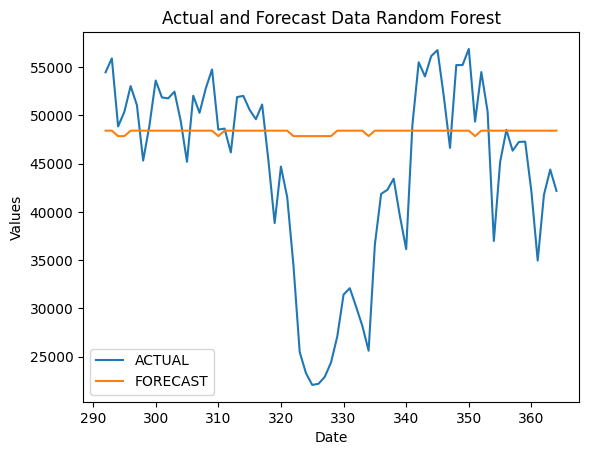

In [219]:
import matplotlib.pyplot as plt

result.plot(kind='line', y=['ACTUAL', 'FORECAST'])

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual and Forecast Data Random Forest')

plt.show()
